In [6]:
from modules.graph_simulation import KineticRates, System, GraphSimulation
from modules.post_process import PostProcess
import matplotlib.pyplot as plt
import numpy as np

In [7]:
loads = [150, 50]
functionalities = [2, 6]
kinetic_rates = KineticRates(functionalities, preset="two_component_uniform")
output_folder = "/home/markjenei/polymerisation-graph-simulation/epoxy-hardener/dgeba-p6a/"
target_conversion = 0.9 # max. extent of reaction
for i in range(100):
    system = System(loads, kinetic_rates)
    sim = GraphSimulation(system, 'data', cycles_allowed=True)
    fsse_path = "./dgeba-p6a_fsse.data"
    conv_path = "./dgeba-p6a_conv.data"
    fsse_monomer_index = 1 # FSSE on monomer B := 1, see above
    sim.set_fsse_file_paths(fsse_monomer_index, fsse_path, conv_path)
    index = str(i).zfill(max(2, len(str(i))))
    save_file_loc = output_folder + "run_"+str(index)+".out"
    sim.run(target_conversion, save_file_loc)

100%|██████████| 270/270.0 [00:05<00:00, 53.75it/s]
100%|██████████| 270/270.0 [00:05<00:00, 51.80it/s]
100%|██████████| 270/270.0 [00:05<00:00, 49.26it/s]
100%|██████████| 270/270.0 [00:05<00:00, 53.80it/s]
100%|██████████| 270/270.0 [00:05<00:00, 52.38it/s]
100%|██████████| 270/270.0 [00:04<00:00, 54.20it/s]
100%|██████████| 270/270.0 [00:05<00:00, 53.00it/s]
100%|██████████| 270/270.0 [00:04<00:00, 54.12it/s]
100%|██████████| 270/270.0 [00:05<00:00, 52.70it/s]
100%|██████████| 270/270.0 [00:04<00:00, 54.58it/s]
100%|██████████| 270/270.0 [00:05<00:00, 51.39it/s]
100%|██████████| 270/270.0 [00:05<00:00, 52.26it/s]
100%|██████████| 270/270.0 [00:05<00:00, 51.33it/s]
100%|██████████| 270/270.0 [00:05<00:00, 52.04it/s]
100%|██████████| 270/270.0 [00:05<00:00, 50.77it/s]
100%|██████████| 270/270.0 [00:05<00:00, 52.85it/s]
100%|██████████| 270/270.0 [00:05<00:00, 53.40it/s]
100%|██████████| 270/270.0 [00:05<00:00, 53.22it/s]
100%|██████████| 270/270.0 [00:05<00:00, 51.34it/s]
100%|███████

....................................................................................................
gel point 0.5219330855018588


Text(0.5, 0, 'conversion')

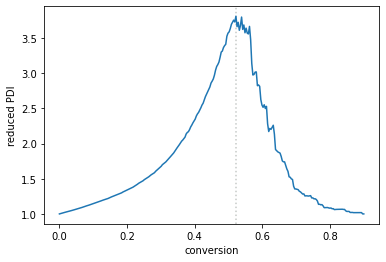

In [8]:
pp = PostProcess(loads, 'file', reactions_folder_path=output_folder, reaction_file_root='run_')
pp.average_sizes(reduced=True)
rpdi = pp.topology_data["dispersion_index"]
c = np.linspace(0, target_conversion, len(rpdi))
gel_point = c[np.nonzero(rpdi == max(rpdi))[0][0]]
print(f"gel point {gel_point}")
plt.axvline(gel_point, ls=':', color='xkcd:silver')
plt.plot(c, rpdi)
plt.ylabel("reduced PDI")
plt.xlabel("conversion")